# PROBLEM DEFINITION

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

PROBLEM DISCRIPTION:
    
    IN THIS WE HAVE TO DEVOLOPE MACHINE LEARNING MODELS WITH THE GIVEN DATASET TO PREDICT THE PROBABLITY OF THE EXISTENCE OF THE HEART DISEASE IN A PERSON.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("Heart_Disease_Data_Set.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


# DATA ANALYSIS AND EDA

FROM THE ABOVE DATA SET WE FIND THAT THEY HAVE A LOT OF MISSING VALUES WHICH ARE DENOTED BY THE "?".

NOW WE WILL REPLACE THE "?" WITH NaN VALUES.

In [3]:
df['ca'] = df['ca'].replace(['?'],np.NaN)
df['thal'] = df['thal'].replace(['?'],np.NaN)
df['num'] = df['num'].replace(['?'],np.NaN)
df['age'] = df['age'].replace(['?'],np.NaN)
df['sex'] = df['sex'].replace(['?'],np.NaN)
df['cp'] = df['cp'].replace(['?'],np.NaN)
df['trestbps'] = df['trestbps'].replace(['?'],np.NaN)
df['chol'] = df['chol'].replace(['?'],np.NaN)
df['fbs'] = df['fbs'].replace(['?'],np.NaN)
df['restecg'] = df['restecg'].replace(['?'],np.NaN)
df['thalach'] = df['thalach'].replace(['?'],np.NaN)
df['exang'] = df['exang'].replace(['?'],np.NaN)
df['oldpeak'] = df['oldpeak'].replace(['?'],np.NaN)
df['slope'] = df['slope'].replace(['?'],np.NaN)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


1.NOW WE WILL FIND THE NUMBER OF NaN VALUES PRESENT IN THE DATA-SET.

In [5]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

1. FROM THE ABOVE TABLE WE FIND THAT "slope","ca","thal" HAVE MISSING VALUES MORE THAN 50%. 

   IF WE TRY TO PROCESS THIS BY IMPUTING THE VALUES WE WILL GET ERRORS WHILE PREDICTING THE TARGET VALUES.
   
   SO WE WILL DROP THE ATTRIBUTES FROM THE GIVEN DATA-SET.

In [6]:
df.drop(["slope","ca","thal"],axis=1,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  num       200 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 17.3+ KB


1. FROM THE ABOVE TABLE WE CAN INFER THAT MANY ATTRIBUTES ARE IN OBJECT DATA TYPE.

In [8]:
df['trestbps'] =df.trestbps.astype(float)
df['chol'] =df.chol.astype(float)
df['fbs'] =df.fbs.astype(float)
df['thalach'] =df.thalach.astype(float)
df['exang'] =df.exang.astype(float)
df['oldpeak'] =df.oldpeak.astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  num       200 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 17.3 KB


BASIC STATISTICAL DATA:

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


FINDING NaN VALUES : 

In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps    56
chol         7
fbs          7
restecg      0
thalach     53
exang       53
oldpeak     56
num          0
dtype: int64

NOW WE FIND SOME ATTRIBUTES WITH NaN VALUES WHICH ARE IMPUTABLE WITH THE MEAN OF THAT SAME ATTRIBUTE.

In [12]:
df=df.fillna(df.mean())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,1
196,62,1,1,133.763889,139.0,0.0,1,122.795918,0.646259,1.320833,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2
198,58,1,4,133.763889,385.0,1.0,2,122.795918,0.646259,1.320833,0


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

EXPLORATORY DATA ANALYSIS

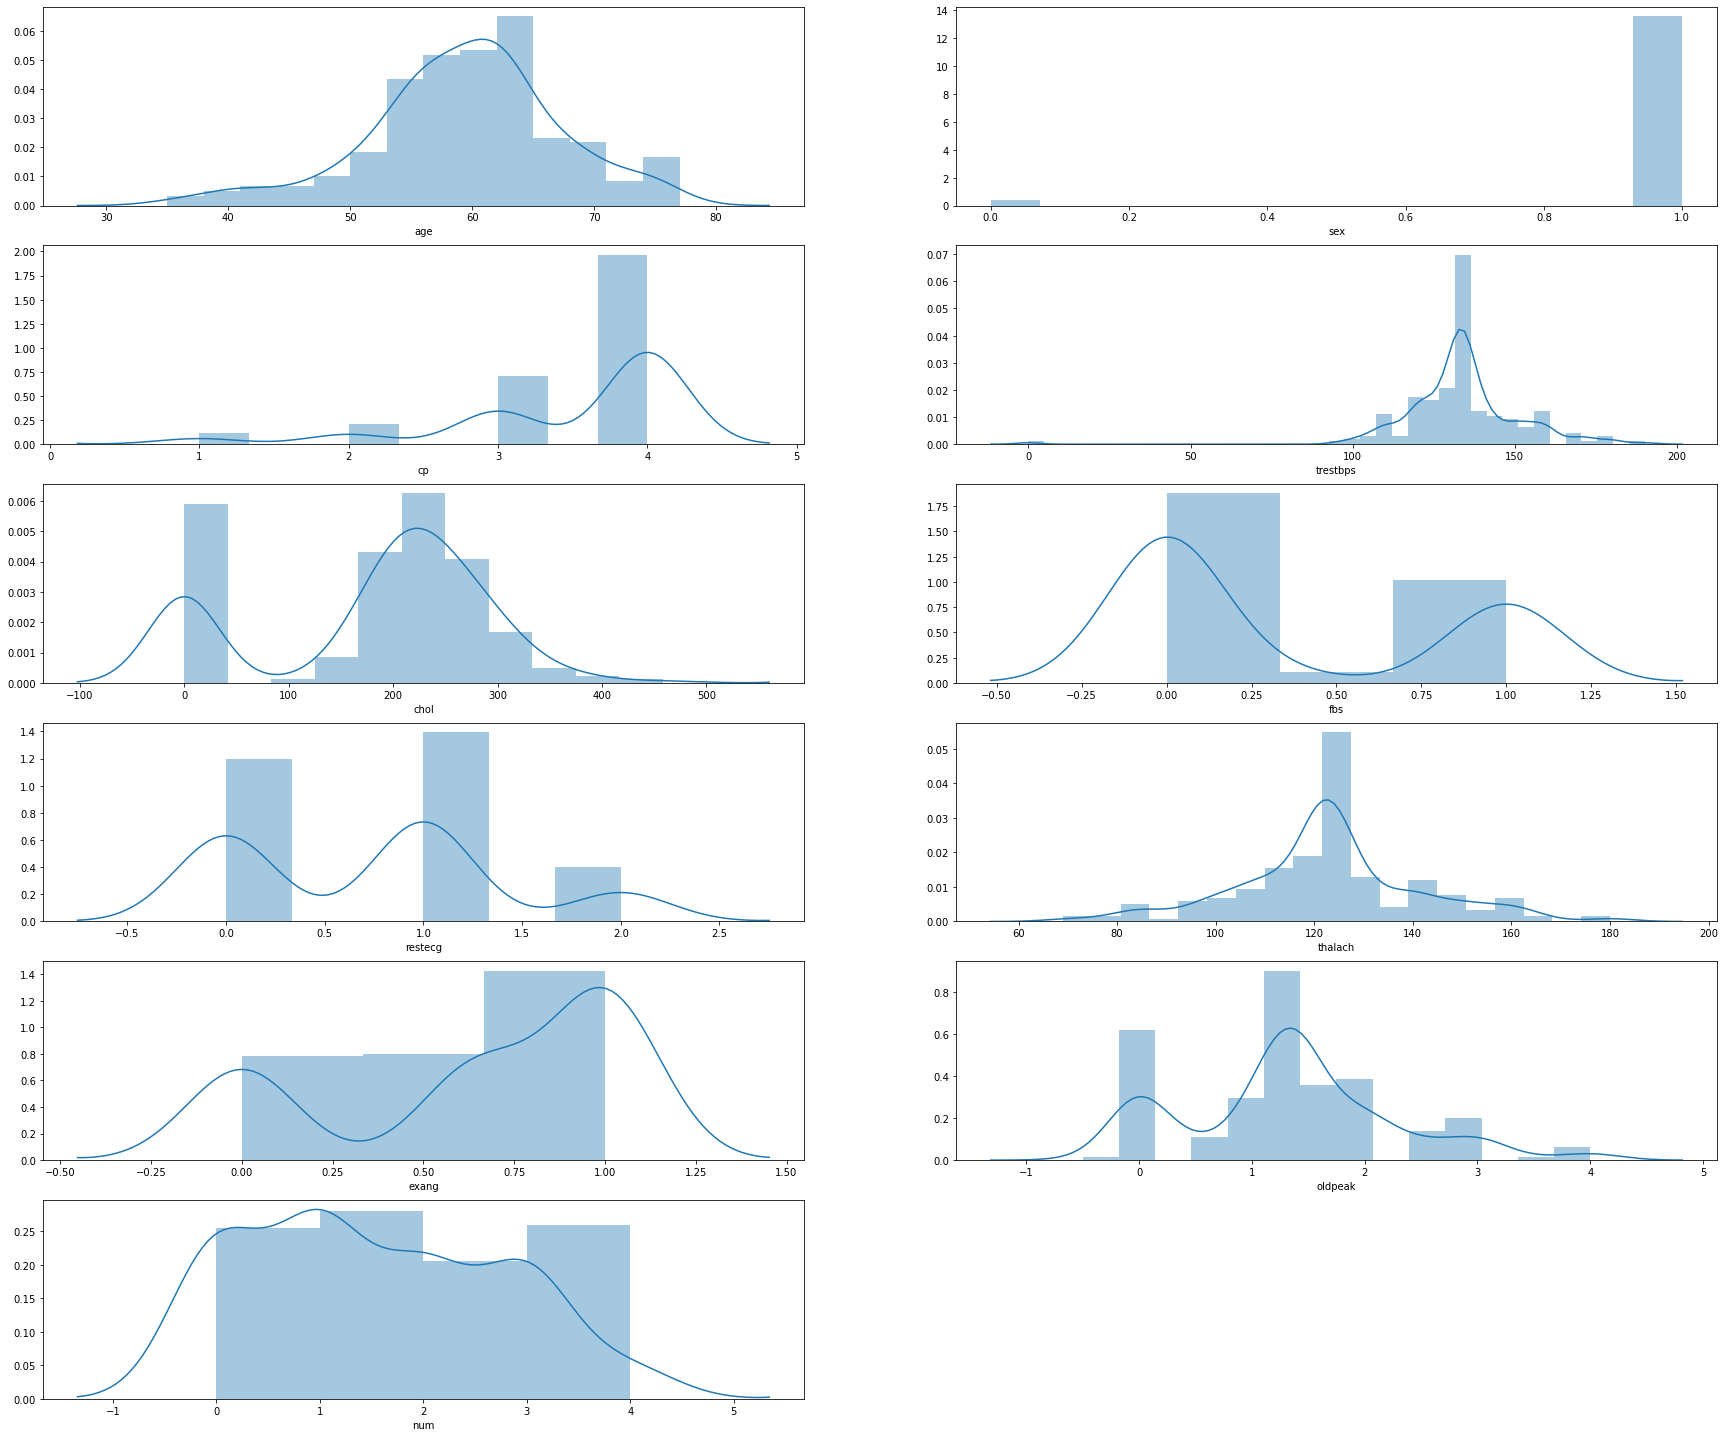

In [14]:
#univariate analysis
collist=df.columns.values
ncol=2
nrow=7
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.distplot(df[collist[i]])

OBSERVATION:
    
    1. THIS PLOT CONSIST OF GRAPHS WHICH EXPLAINS THAT 'AGE','RESTCG','NUM','THALACH' WHICH HAVE A NORMAL DISTRIBUTION.
    
    2. OTHER ATTRIBUTES HAVE SOMEWHAT SKEWED DISTRIBUTION.
    

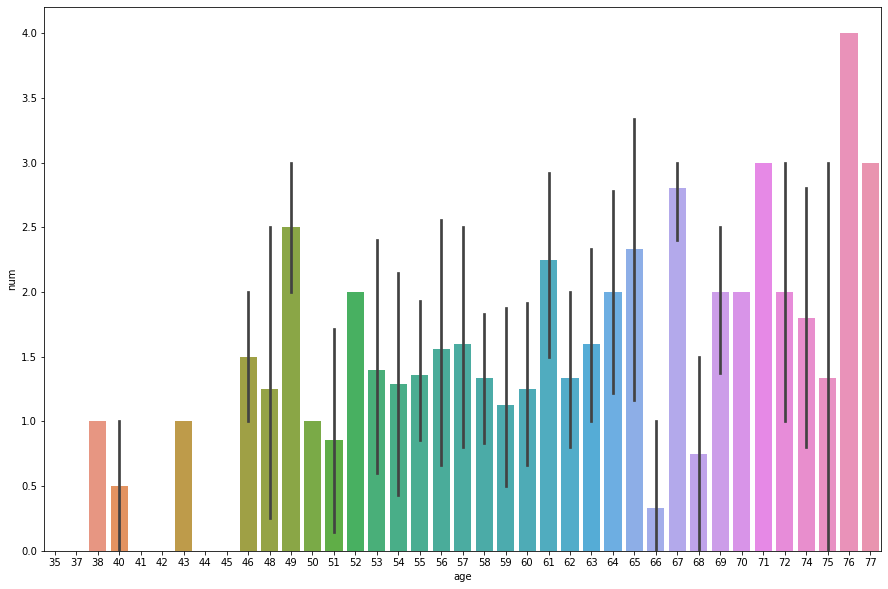

In [15]:
#BI-VARIATE ANALYSIS
plt.figure(figsize=(15,10))
sn.barplot(x="age",y="num",data=df)

1. THIS ABOVE GRAPH SHOWS THE PRESENCE OF HEART DISEASE ALONG THE AGE RANGE.

   IT SEEMS OLDER AGE GROUP BETWEEN 70-77 HAS A HIGHER RISK OF GETTING A HEART DISEASE.

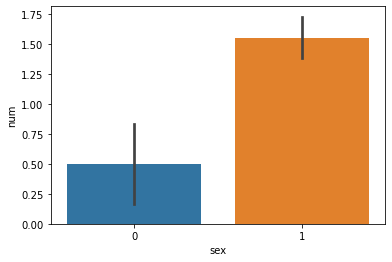

In [16]:
sn.barplot(x="sex",y="num",data=df)

1. MALE HAVE A HIGHER RISK OF GETTING A HEART DISEASE COMPARED TO FEMALES.

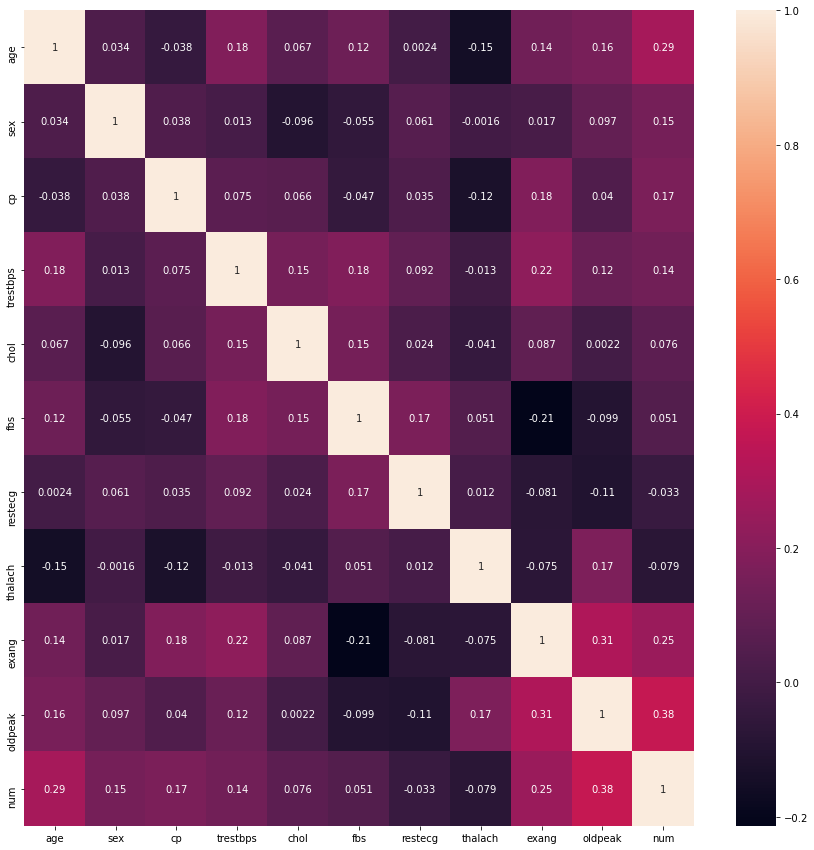

In [17]:
corr=df.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr,annot=True)

OBSERVATION :
    
    1. IN THIS CORRELATION CHART FACTORS LIKE AGE,SEX,CP,TRESTBPS,CHOL,FBS,EXANG,OLDPEAK CORRELATE POSITIVELY TOWARDS THE TARGET VALUE.
    
    2. WHEREAS RESTECG,TAHALCH CORRELATE NEGATIVELY TOWARDS THE TARGET VALUE.

In [18]:
df["num"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,1
196,62,1,1,133.763889,139.0,0.0,1,122.795918,0.646259,1.320833,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2
198,58,1,4,133.763889,385.0,1.0,2,122.795918,0.646259,1.320833,0


# FINDING SKEWNESS FOR THE GIVEN DATA-SET

In [20]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.634130
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
num         0.297393
dtype: float64

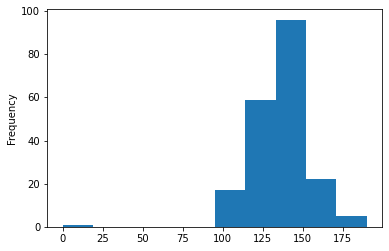

In [21]:
df["trestbps"].plot.hist()

# PLOTTING OUTLIERS

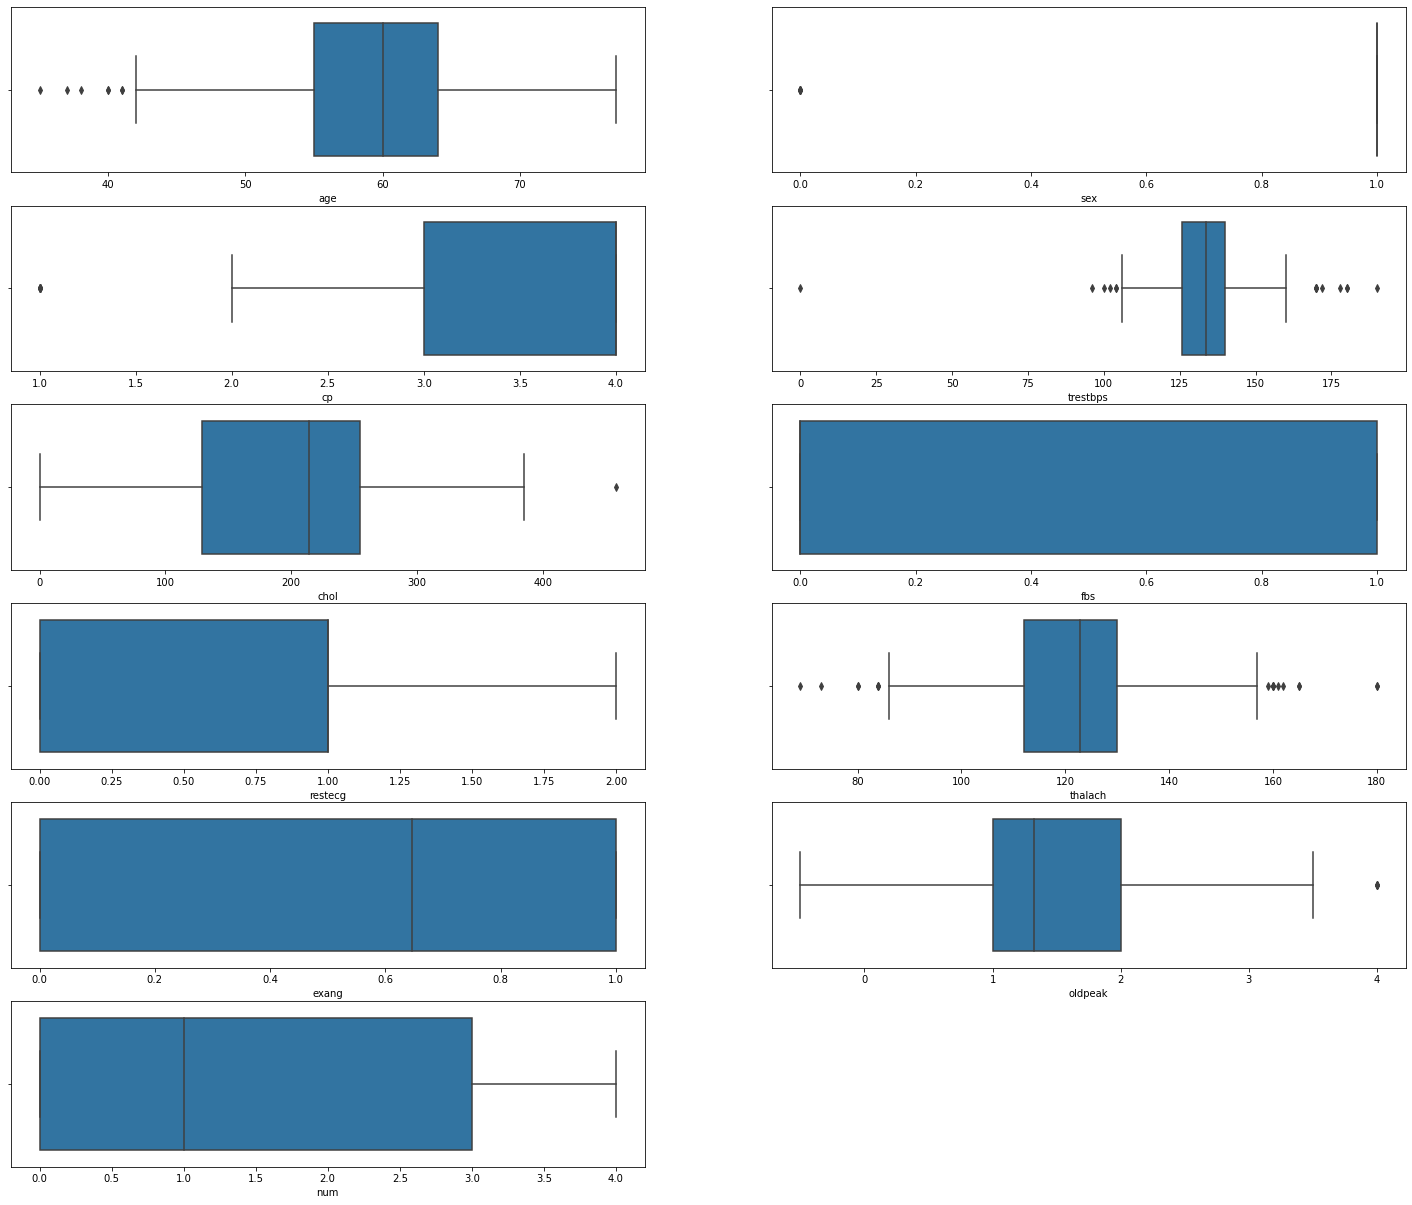

In [22]:
collist=df.columns.values
ncol=2
nrow=7
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

# REMOVING OUTLIERS

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        8.62970996e-01, 1.79511750e+00, 3.94610899e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        1.57658163e+00, 1.41204031e+00, 1.24960118e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        8.62970996e-01, 1.91538592e-01, 3.94610899e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.57658163e+00, 1.41204031e+00, 3.94610899e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        0.00000000e+00, 2.37377363e-16, 1.24960118e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        8.62970996e-01, 1.41204031e+00, 4.27495141e-01]])

In [24]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.000000,170.0,0.0,1,138.000000,1.000000,0.000000,1
194,46,1,4,134.000000,310.0,0.0,0,126.000000,0.000000,0.000000,2
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2
198,58,1,4,133.763889,385.0,1.0,2,122.795918,0.646259,1.320833,0


# BUILIDING MACHINE LEARNING MODELS

# PREPARING DATA-SET FOR TRAINING AND TESTING

In [25]:
x=df.drop("num",axis=1)
y=df["num"]

In [26]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [28]:
x_train.shape

(140, 10)

In [29]:
y_train.shape

(140,)

In [30]:
x_test.shape

(60, 10)

In [31]:
y_test.shape

(60,)

# MACHINE LEARNING MODEL

MACHINE LEARNING MODELS For the above data-set we will use

1.LOGISTIC REGRESSION

2.NAIVES BAYES CLASSIFICATION

3.RANDOM FOREST


In [32]:
#Logictic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred))
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))

[3 0 1 3 0 3 0 1 0 2 0 1 1 3 3 1 1 1 1 2 0 3 1 0 3 1 3 1 3 3 0 0 2 2 1 0 0
 3 1 0 0 1 1 0 1 0 0 1 3 2 1 3 0 0 3 2 3 0 3 0]

Accuracy score :  0.38333333333333336

Confussion matrix :  [[8 3 0 1 0]
 [8 8 2 2 0]
 [2 4 2 4 0]
 [2 3 2 5 0]
 [0 0 0 4 0]]

classification report :                precision    recall  f1-score   support

           0       0.40      0.67      0.50        12
           1       0.44      0.40      0.42        20
           2       0.33      0.17      0.22        12
           3       0.31      0.42      0.36        12
           4       0.00      0.00      0.00         4

    accuracy                           0.38        60
   macro avg       0.30      0.33      0.30        60
weighted avg       0.36      0.38      0.36        60



In [33]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=8.9902777777778,cross_value_score=10.6852178365339,and difference=-1.6949400587560994


In [34]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
acc={metrics.accuracy_score(y_test, y_pred)*100}
print("Accuracy:",acc)

Accuracy: {26.666666666666668}



# CONCLUSION REMARKS:


# NOW WE CAN SEE THAT FROM THE ABOVE CLASSIFICATION MACHINE LEARNING MODELS "LOGISTIC REGRESSION" HAS A HIGHEST ACCURACY RATE OF 38.0% .
# WHICH IS NOT AN PROMISING ACCURACY VALUE FOR PREDICTING A PROBABILITY.
# THIS SUGGESTS THAT THE DATA SET NEEDS A LOT OF ENGINNERING BY THE ADDITION OF MORE DATA ATTRIBUTES.





# COMPARING THE ORIGINAL AND PREDICTED DATAS


In [35]:
a=np.array(y_test)
predicted=np.array(y_pred)
new=pd.DataFrame({"original":a,"predicted":predicted})
new.head()

,original,predicted
0,3,3
1,0,3
2,3,2
3,2,2
4,0,0


# SAVING THE DATA-SET FOR PRODUCTION

In [36]:
import joblib 
joblib.dump(lg,"Heart_Disease.pkl")

['Heart_Disease.pkl']